# Часть 1
### Cоздание массива данных

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('dataset_for_project.xlsx')
df

,№,Наименование,Год,"Возраст компании, лет",Статус,Организационно-правовая форма,Форма собственности,"Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
0,1,"ПОДШИПНИК, ЗАО ТД",20,24.5,1,0,0,2414000.0,3259000,-247052000.0,22730000.0,227573000.0,250303000.0,25000.0,0.0022,0.740718,-75.806075,6.974532,69.829089,76.803621,0.007671,0,0,1,1,0,0,0,0,0
1,2,"СИНДИКАТ-С, ООО",20,12.0,1,5,0,413000.0,413000,-26249000.0,24121000.0,2530000.0,26651000.0,9970000.0,3.0963,1.000000,-63.556901,58.404358,6.125908,64.530266,24.140436,0,0,1,0,0,0,0,0,1
2,3,"СФЕРА УПАКОВКИ, ООО",20,5.0,1,5,0,168824000.0,168824000,4711000.0,2059000.0,161944000.0,164003000.0,121213000.0,0.6894,1.000000,0.027905,0.012196,0.959248,0.971444,0.717984,0,0,1,0,0,0,0,0,1
3,4,"ТЭС, АО",20,10.5,1,0,0,79877000.0,87991000,-21156000.0,1000.0,108074000.0,108075000.0,17238000.0,0.1468,0.907786,-0.240434,0.000011,1.228239,1.228251,0.195906,0,0,1,1,0,0,0,0,0
4,5,"АВТОКОЛОННА 1958, ООО",20,28.0,1,5,0,53509000.0,174544000,-31963000.0,32626000.0,172294000.0,204920000.0,1463000.0,0.0079,0.306565,-0.183123,0.186921,0.987109,1.174031,0.008382,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,3455,"ЯРКОВСКАЯ, СЕЛЬХОЗАРТЕЛЬ",19,28.0,0,2,0,70630000.0,153836000,63959000.0,20741000.0,21222000.0,41963000.0,86652000.0,0.5934,0.459125,0.415761,0.134825,0.137952,0.272778,0.563275,0,0,1,0,0,1,0,0,0
3455,3456,"ЯРКОВСКОЕ, АО СХП",19,28.0,0,0,0,168457000.0,454656000,342323000.0,13318000.0,98863000.0,112181000.0,150780000.0,0.3372,0.370515,0.752927,0.029292,0.217446,0.246738,0.331635,0,0,1,1,0,0,0,0,0
3456,3457,"ЯРОВИТ, ООО",19,8.5,0,5,0,128667000.0,305088000,144677000.0,9801000.0,18074000.0,27875000.0,117500000.0,0.2777,0.421737,0.474214,0.032125,0.059242,0.091367,0.385135,0,0,1,0,0,0,0,0,1
3457,3458,"ЯРТЕХСЕРВИС, ООО",19,14.0,0,5,0,44081000.0,52944000,46840000.0,62000.0,6032000.0,6094000.0,94691000.0,1.8193,0.832597,0.884708,0.001171,0.113932,0.115103,1.788512,0,0,1,0,0,0,0,0,1


Удаляем пустые значения

In [3]:
df = df.dropna()

Удаляем целевую переменную из датасета

In [4]:
data = df.copy()
Y = data['Статус']
data = data.drop(['Статус'], axis=1)

In [5]:
Y.value_counts()

0    2875
1     202
Name: Статус, dtype: int64

Создаем числовой массив данных. Убираем текстовые и категориальные переменные.

In [6]:
data_num = data.copy()
data_num = data_num.drop(['№','Наименование', 'Организационно-правовая форма', 'Форма собственности'], axis = 1)

Создаем таблицу корреляций регрессоров с зависимой

In [7]:
corr_matr = data_num.corrwith(Y)

In [8]:
corr_matr = corr_matr.to_dict()
tab = {'indicator': list(corr_matr.keys()) , 'value': list(corr_matr.values())}
tabl = pd.DataFrame(tab, columns = ['indicator','value'])
tabl = tabl.sort_values(by=['value'])

Переменные, которые коррелируют с зависимой переменной с коэффом > 0.05

In [9]:
tabl[abs(tabl['value']) > 0.05]

,indicator,value
0,Год,-0.293500
11,Нераспределенная прибыль (непокрытый убыток)/ТА,-0.088326
9,Коэффициент оборачиваемости совокупных активов,-0.079991
18,Частная,-0.068405
21,Сельское хозво,-0.067936
15,Выручка/ТА,-0.054408
12,Долгосрочные обязательства/ТА,0.083432
14,Совокупный долг/ТА,0.090718
3,"Активы всего, RUB",0.094959
13,Краткосрочные обязательства/ТА,0.097256


Создаем 2 массива коэффициентов. 1ый - high_corr_cols, высококоррелируемые переменные. Cols - весь массив данных за исключением неотнормированных на TA переменных и за исключением некоторых dummy (чтобы исключить мультиколлинеарность) 

In [10]:
high_corr_cols = np.array(tabl.indicator[abs(tabl['value']) > 0.05])
high_corr_cols = np.delete(high_corr_cols, 4)

In [11]:
high_corr_cols

array(['Год', 'Нераспределенная прибыль (непокрытый убыток)/ТА',
       'Коэффициент оборачиваемости совокупных активов', 'Частная',
       'Выручка/ТА', 'Долгосрочные обязательства/ТА',
       'Совокупный долг/ТА', 'Активы  всего, RUB',
       'Краткосрочные обязательства/ТА', 'Оборотные активы, RUB',
       'Совокупный долг, RUB', 'Краткосрочные обязательства, RUB', 'АО'],
      dtype=object)

In [12]:
cols = np.array(tabl.indicator)
cols

array(['Год', 'Нераспределенная прибыль (непокрытый убыток)/ТА',
       'Коэффициент оборачиваемости совокупных активов', 'Частная',
       'Сельское хозво', 'Выручка/ТА', 'ООО', 'Неком', 'Кооперативы',
       'Оборотные активы/ТА',
       'Нераспределенная прибыль (непокрытый убыток), RUB',
       'Выручка, RUB', 'Гос собственность.1', 'Возраст компании, лет',
       'Гос собственность', 'Частичная',
       'Долгосрочные обязательства, RUB', 'Долгосрочные обязательства/ТА',
       'Совокупный долг/ТА', 'Активы  всего, RUB',
       'Краткосрочные обязательства/ТА', 'Оборотные активы, RUB',
       'Совокупный долг, RUB', 'Краткосрочные обязательства, RUB', 'АО'],
      dtype=object)

In [13]:
cols = np.delete(cols, [3, 8, 10, 11, 12, 15, 16, 18, 20, 21, 22, 23])   
cols

array(['Год', 'Нераспределенная прибыль (непокрытый убыток)/ТА',
       'Коэффициент оборачиваемости совокупных активов', 'Сельское хозво',
       'Выручка/ТА', 'ООО', 'Неком', 'Оборотные активы/ТА',
       'Возраст компании, лет', 'Гос собственность',
       'Долгосрочные обязательства/ТА', 'Активы  всего, RUB', 'АО'],
      dtype=object)

Корреляционные матрицы:

<AxesSubplot:title={'center':'Pearson Correlation of Indicators'}>

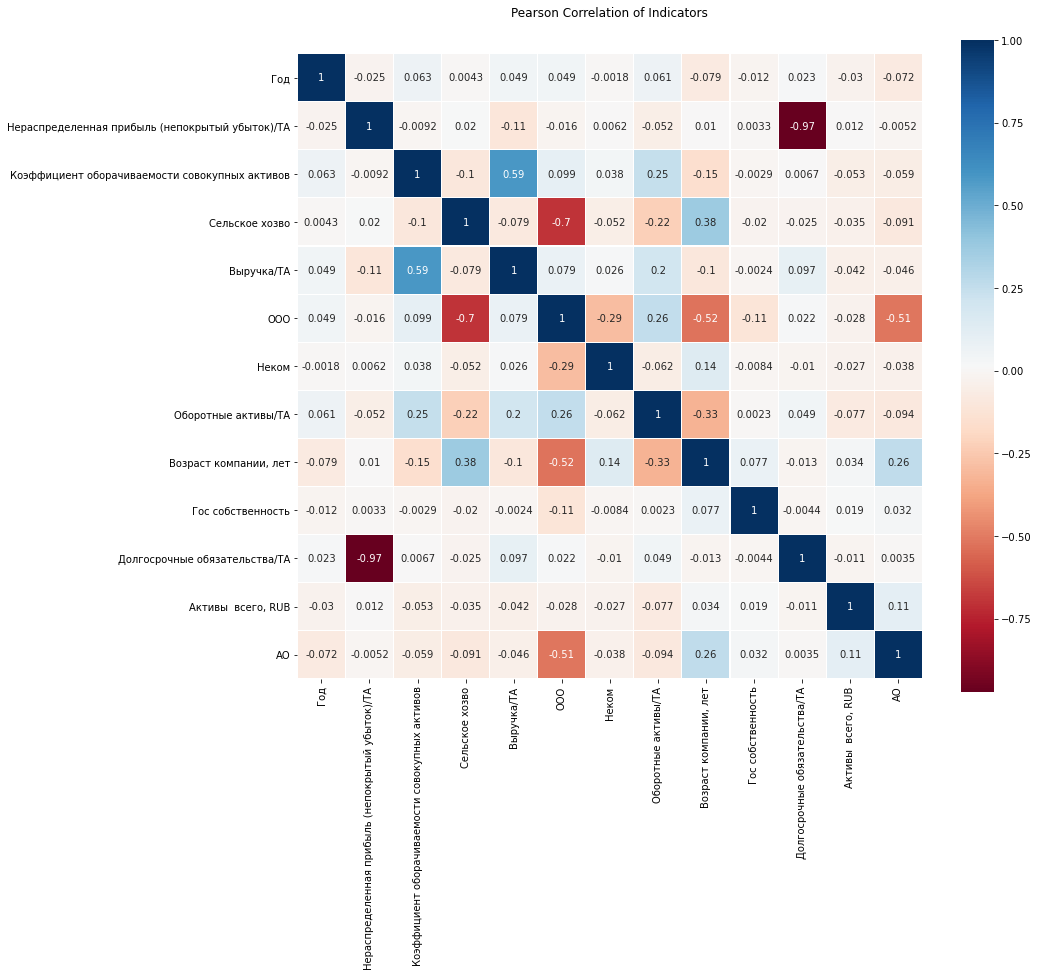

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=12)
sns.heatmap(data[cols].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:title={'center':'Pearson Correlation of Indicators'}>

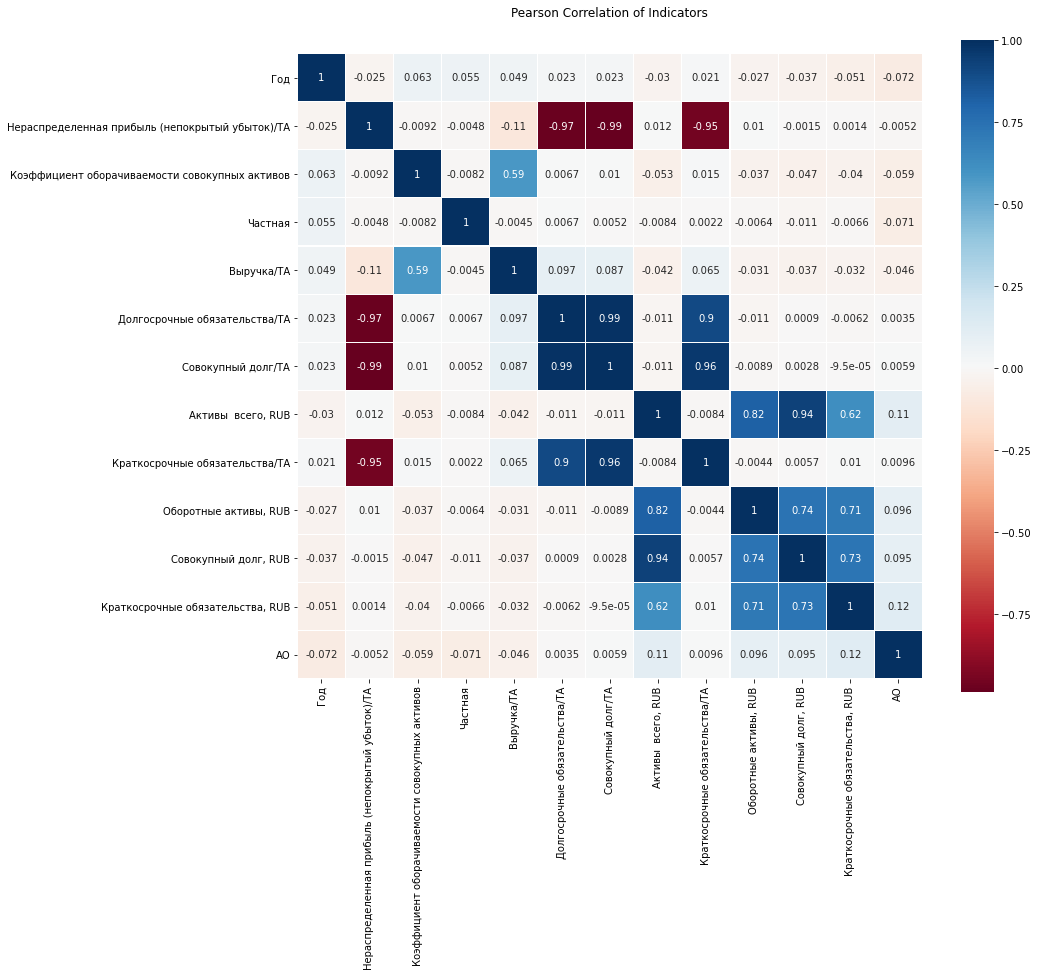

In [15]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=12)
sns.heatmap(data[high_corr_cols].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Создаем датасеты, содержащие вышеперечисленные переменные

In [15]:
data_final = data[high_corr_cols]
data_final_1 = data[cols]

In [16]:
data_final = data_final.drop(['Краткосрочные обязательства/ТА', 'Совокупный долг/ТА'], axis =1)

# Часть 2
### Эконометрические модели

Прогоняем логит на данных cols

In [17]:
import statsmodels.api as sm
Logit_model=sm.Logit(Y,data_final_1)
result=Logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.193702
         Iterations 12
                                         Results: Logit
Model:                         Logit                      Pseudo R-squared:           0.200     
Dependent Variable:            Статус                     AIC:                        1218.0416 
Date:                          2021-03-21 13:00           BIC:                        1296.4538 
No. Observations:              3077                       Log-Likelihood:             -596.02   
Df Model:                      12                         LL-Null:                    -745.35   
Df Residuals:                  3064                       LLR p-value:                8.9399e-57
Converged:                     1.0000                     Scale:                      1.0000    
No. Iterations:                12.0000                                                          
-----------------------------------------------------------------

Прогоняем пробит на данных cols

In [18]:
Probit_model=sm.Probit(Y,data_final_1)
result=Probit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.198965
         Iterations 9
                                        Results: Probit
Model:                        Probit                     Pseudo R-squared:           0.179     
Dependent Variable:           Статус                     AIC:                        1250.4325 
Date:                         2021-03-21 13:00           BIC:                        1328.8447 
No. Observations:             3077                       Log-Likelihood:             -612.22   
Df Model:                     12                         LL-Null:                    -745.35   
Df Residuals:                 3064                       LLR p-value:                5.4633e-50
Converged:                    1.0000                     Scale:                      1.0000    
No. Iterations:               9.0000                                                           
--------------------------------------------------------------------------

То же самое, но на данных high_corr_cols:

In [44]:
import statsmodels.api as sm
Logit_model=sm.Logit(Y,data_final)
result=Logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.205138
         Iterations 10
                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.153     
Dependent Variable:           Статус                     AIC:                        1284.4166 
Date:                         2021-03-21 13:19           BIC:                        1350.7654 
No. Observations:             3077                       Log-Likelihood:             -631.21   
Df Model:                     10                         LL-Null:                    -745.35   
Df Residuals:                 3066                       LLR p-value:                1.9578e-43
Converged:                    1.0000                     Scale:                      1.0000    
No. Iterations:               10.0000                                                          
--------------------------------------------------------------------------

In [45]:
Probit_model=sm.Probit(Y,data_final)
result=Probit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.205608
         Iterations 9
                                        Results: Probit
Model:                        Probit                     Pseudo R-squared:           0.151     
Dependent Variable:           Статус                     AIC:                        1287.3112 
Date:                         2021-03-21 13:19           BIC:                        1353.6600 
No. Observations:             3077                       Log-Likelihood:             -632.66   
Df Model:                     10                         LL-Null:                    -745.35   
Df Residuals:                 3066                       LLR p-value:                7.9132e-43
Converged:                    1.0000                     Scale:                      1.0000    
No. Iterations:               9.0000                                                           
--------------------------------------------------------------------------

# Часть 3
### Модели машинного обучения

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [48]:
X = data_final_1

Делим выборку случайным образом на тренировочную и тестовую. Это нужно, чтобы после обучения на тренировочной,
можно было тестировать точность модели на тестовой.

In [49]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size = 0.3)

1) Прогоняем модели к ближайших соседей, смотрим на точность, выбираем наилучший к

In [50]:
train = []
test = []
NN = []

In [23]:
for k in [1, 3, 5, 10, 15, 25]:
    NN.append(k)
    y_predicted_test = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)
    test.append(np.mean(y_test==y_predicted_test))
    y_predicted_train = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_train)
    train.append(np.mean(y_train==y_predicted_train))

In [24]:
tab = {'NN': NN, 'Train': train , 'Test': test}
tabl = pd.DataFrame(tab, columns = ['NN','Train', 'Test'])
tabl

,NN,Train,Test
0,1,1.000000,0.871212
1,3,0.941013,0.915584
2,5,0.934974,0.931818
3,10,0.930794,0.939394
4,15,0.931723,0.942641
5,25,0.931259,0.941558


Лучше выбрать 5 соседей

2) прогоняем модели: Случайный лес, Логит регрессию, Градиентный бустинг и КНН (k = 5)

In [26]:
import mlxtend
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [27]:
X_tr = np.array(X_train)
y_tr = np.array(y_train)

In [36]:
train = []
test = []
model = []

In [37]:
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 =  GradientBoostingClassifier(n_estimators=300)
clf4 = KNeighborsClassifier(n_neighbors = 5)
labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN (k = 5)']
for clf, lab in zip([clf1, clf2, clf3, clf4],
                         labels):
    model.append(lab)
    y_predicted_test = clf.fit(X_train, y_train).predict(X_test)
    test.append(np.mean(y_test==y_predicted_test))
    y_predicted_train = clf.fit(X_train, y_train).predict(X_train)
    train.append(np.mean(y_train==y_predicted_train))

In [38]:
tab = {'model': model, 'Train': train , 'Test': test}
tabl = pd.DataFrame(tab, columns = ['model','Train', 'Test'])
tabl

,model,Train,Test
0,Logistic Regression,0.931723,0.940476
1,Random Forest,1.000000,0.953463
2,Gradient Boosting,0.996749,0.952381
3,KNN (k = 5),0.934974,0.931818


Модели, кажется, предсказывают статус очень хорошо, но так как небанкротств значительно больше, чем банкротств,
возникает предположение, что модели хорошо предсказывают только небанкротсва. Посмотрим отдельно на предсказания
каждого из статусов

Это сделаем с помошью confusion matrix и classification report. 
Про confusion matrix читайте тут https://en.wikipedia.org/wiki/Confusion_matrix

Если коротко, то в этих матрицах 2х2 в клетках 11 и 22 верно предсказанные значения, в 12 - ошибочно предсказанные банкротства, в 21 - ошибочные небанкротства

In [39]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_train, y_train)
    print('------------------------'+lab+'------------------------')
    y_train_pred = clf.predict(X_train)
    arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
    print(confusion_matrix(**arg_train))
    print(classification_report(**arg_train)) 

------------------------Logistic Regression------------------------
[[2005    0]
 [ 147    1]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2005
           1       1.00      0.01      0.01       148

    accuracy                           0.93      2153
   macro avg       0.97      0.50      0.49      2153
weighted avg       0.94      0.93      0.90      2153

------------------------Random Forest------------------------
[[2005    0]
 [   0  148]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2005
           1       1.00      1.00      1.00       148

    accuracy                           1.00      2153
   macro avg       1.00      1.00      1.00      2153
weighted avg       1.00      1.00      1.00      2153

------------------------Gradient Boosting------------------------
[[2005    0]
 [   7  141]]
              precision    recall  f1-score   support

           0  

На тренировочной выборке отлично работают модели Рандомный лес и Градиентный бустинг. Логит и КНН хорошо предсказывают
небанкротства, с банкротствами ошибаются

Проверим теперь на тестовой выборке

In [40]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_test, y_test)
    print('------------------------'+lab+'------------------------')
    y_test_pred = clf.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test)) 

------------------------Logistic Regression------------------------
[[870   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       870
           1       0.00      0.00      0.00        54

    accuracy                           0.94       924
   macro avg       0.47      0.50      0.48       924
weighted avg       0.89      0.94      0.91       924

------------------------Random Forest------------------------
[[870   0]
 [  0  54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       1.00      1.00      1.00        54

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924

------------------------Gradient Boosting------------------------
[[870   0]
 [  0  54]]
              precision    recall  f1-score   support

           0       1.00   

Вывод тот же самый. У Рандомного леса и Градиентного бусинга никаких проблем. Эти модели - наилучшие

Теперь прогоним модели на массиве данных high_corr_cols.

In [62]:
X = data_final
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size = 0.3)
X_tr = np.array(X_train)
y_tr = np.array(y_train)


In [63]:
train = []
test = []
model = []

In [64]:
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 =  GradientBoostingClassifier(n_estimators=300)
clf4 = KNeighborsClassifier(n_neighbors = 5)
labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN (k = 5)']
for clf, lab in zip([clf1, clf2, clf3, clf4],
                         labels):
    model.append(lab)
    y_predicted_test = clf.fit(X_train, y_train).predict(X_test)
    test.append(np.mean(y_test==y_predicted_test))
    y_predicted_train = clf.fit(X_train, y_train).predict(X_train)
    train.append(np.mean(y_train==y_predicted_train))

In [65]:
tab = {'model': model, 'Train': train , 'Test': test}
tabl = pd.DataFrame(tab, columns = ['model','Train', 'Test'])
tabl

,model,Train,Test
0,Logistic Regression,0.931259,0.941558
1,Random Forest,1.000000,0.953463
2,Gradient Boosting,0.997678,0.956710
3,KNN (k = 5),0.937761,0.936147


In [66]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_train, y_train)
    print('------------------------'+lab+'------------------------')
    y_train_pred = clf.predict(X_train)
    arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
    print(confusion_matrix(**arg_train))
    print(classification_report(**arg_train)) 

------------------------Logistic Regression------------------------
[[2002    3]
 [ 145    3]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2005
           1       0.50      0.02      0.04       148

    accuracy                           0.93      2153
   macro avg       0.72      0.51      0.50      2153
weighted avg       0.90      0.93      0.90      2153

------------------------Random Forest------------------------
[[2005    0]
 [   0  148]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2005
           1       1.00      1.00      1.00       148

    accuracy                           1.00      2153
   macro avg       1.00      1.00      1.00      2153
weighted avg       1.00      1.00      1.00      2153

------------------------Gradient Boosting------------------------
[[2005    0]
 [   5  143]]
              precision    recall  f1-score   support

           0  

In [67]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_test, y_test)
    print('------------------------'+lab+'------------------------')
    y_test_pred = clf.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test)) 

------------------------Logistic Regression------------------------
[[867   3]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       870
           1       0.25      0.02      0.03        54

    accuracy                           0.94       924
   macro avg       0.60      0.51      0.50       924
weighted avg       0.90      0.94      0.91       924

------------------------Random Forest------------------------
[[870   0]
 [  0  54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       1.00      1.00      1.00        54

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924

------------------------Gradient Boosting------------------------
[[870   0]
 [  0  54]]
              precision    recall  f1-score   support

           0       1.00   

С таким массивом данных модели работают чуть лучше. Но таки или иначе точность у всех моделей примерно одинаковая